## K - Meaning Clustering 

### Problem Definition
Perform K-Means Clustering on a dataset containing shopping details of customers from various cities to understand how clustering segregates the data similar to each other.
### Dataset Description
The dataset is based on the the shopping details of customers of few cities. The data has been populated randomly and holds no such relation to any real systems data or confidential data. It has 8 dimensions or features with 200 entries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [9]:
km1 = pd.read_csv(r"C:\Users\Shivani Dussa\Downloads\employee_data.csv")

In [11]:
km1.head(4)
print(km1.shape)

(14999, 10)


In [29]:
km1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
783,0.36,0.46,2,132,3,0,1,0,sales,low
784,0.44,0.57,2,131,3,0,1,0,sales,low
785,0.85,0.99,5,248,5,0,1,0,sales,low
786,0.78,0.93,5,225,5,0,1,0,sales,low
787,0.39,0.46,2,156,3,0,1,0,sales,low


In [19]:
km1.drop_duplicates(keep = False,inplace = True)

In [20]:
km1.duplicated().sum()

0

In [21]:
km1.shape

(9653, 10)

In [30]:
# here we were taking only two features
km = km1[["satisfaction_level","quit"]]

In [31]:
km.head()

,satisfaction_level,quit
783,0.36,1
784,0.44,1
785,0.85,1
786,0.78,1
787,0.39,1


In [32]:
km.isnull().sum()

satisfaction_level    0
quit                  0
dtype: int64

In [33]:
km.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,9653.0,0.642706,0.234450,0.09,0.5,0.67,0.83,1.0
quit,9653.0,0.111986,0.315365,0.00,0.0,0.00,0.00,1.0


### plot the unclustered data

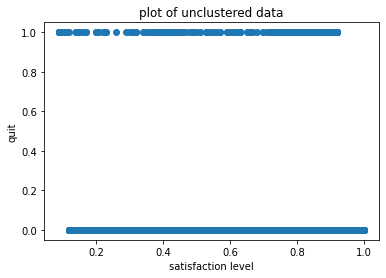

In [36]:
plt.scatter(km.iloc[:,0],km.iloc[:,1])
plt.xlabel('satisfaction level')
plt.ylabel('quit')
plt.title('plot of unclustered data')
plt.show()



**K-means Clustering Algorithm** is a simple and easy to implement **unsupervised** machine learning algorithm.
The main objective of K-means clustering is to group similar data points together into a cluster.It is used when we have unlabelled data.
The aim of this algorithm is to divide 'n' number of observations into 'k' number of clusters.  

A **cluster** refers to a collection of data points clubbed together because of existing similarities between them. The task of identifying and assigning similar data-points to a cluster is known as **Clustering**.


### K - Means Using scikit learn   

In [41]:
# here we are assuming k = 5
kmeans = KMeans(n_clusters = 5)
kmeans.fit(km)

KMeans(n_clusters=5)

In [44]:
# here, we are generating labels of each point 
labels = kmeans.predict(km)
labels

array([1, 1, 4, ..., 2, 0, 3])

In [67]:
np.set_printoptions(formatter={'float_kind' : '{:.2f}'.format })

In [68]:
centroids = kmeans.cluster_centers_
centroids

array([[0.57, -0.00],
       [0.44, 1.00],
       [0.79, -0.00],
       [0.98, -0.00],
       [0.23, 0.00],
       [0.76, 1.00],
       [0.11, 1.00],
       [0.63, -0.00],
       [0.89, -0.00],
       [0.43, 0.00],
       [0.69, -0.00],
       [0.34, 0.00],
       [0.16, 0.00],
       [0.38, 1.00],
       [0.74, -0.00],
       [0.87, 1.00],
       [0.50, -0.00],
       [0.84, -0.00],
       [0.93, 0.00],
       [0.60, 1.00]])

In [69]:
kmeans.inertia_

3.061131476200467

Visualization the Cluster data

In [70]:
km['labels'] = labels
km.head()

,satisfaction_level,quit,labels
783,0.36,1,1
784,0.44,1,1
785,0.85,1,4
786,0.78,1,4
787,0.39,1,1


In [71]:
colmp = {0: 'r', 1: 'g',2: 'b',3:'y',4:'c'}
km['color'] = km['labels'].apply(lambda x:colmp[x])
km.head()

,satisfaction_level,quit,labels,color
783,0.36,1,1,g
784,0.44,1,1,g
785,0.85,1,4,c
786,0.78,1,4,c
787,0.39,1,1,g


In [72]:
km.tail()

,satisfaction_level,quit,labels,color
10567,0.75,0,2,b
10568,0.91,0,2,b
10569,0.84,0,2,b
10570,0.64,0,0,r
10571,0.15,0,3,y


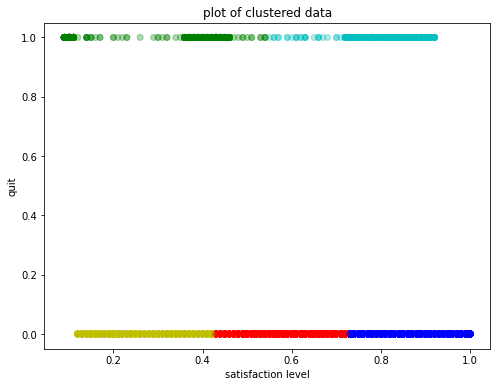

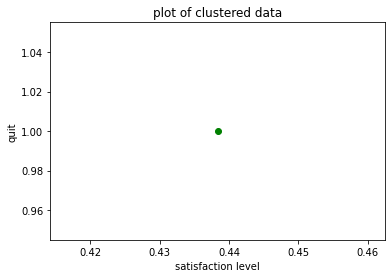

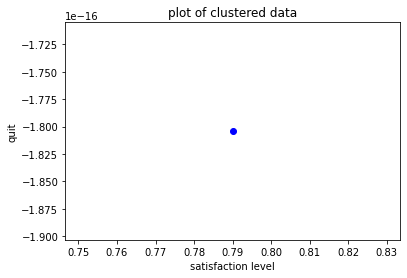

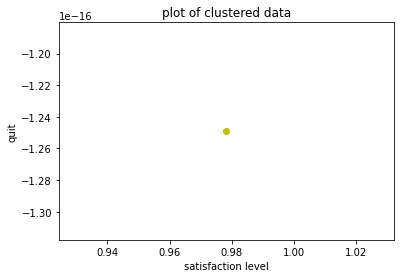

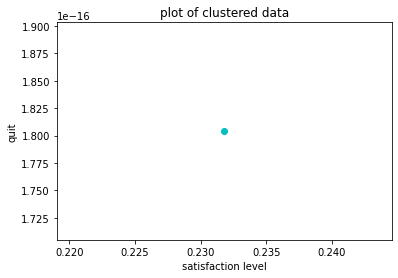

KeyError: 5

In [73]:
plt.figure(figsize = (8,6))
plt.scatter(km['satisfaction_level'],km['quit'],color = km['color'], alpha = 0.3)
for idx, centriod in enumerate(centroids):
    plt.scatter(*centriod,color = colmp[idx])
    
    plt.xlabel('satisfaction level')
    plt.ylabel('quit')
    plt.title('plot of clustered data')
    plt.show()


### How to determine the value of K?

* If we know how many classes we want to classify, then we use that value as 'k'. For Example - All of us have heard of the Iris data or even worked with it earlier. It has three classes we could classify our flowers into. So, in that case the value of k could be taken as 3.
* If we don't know how many classes we want, then we will have to decide what the best 'k' value is. A very popular to find the value of 'k' is **Elbow Method**
* **Inertia** is the WCSS (within cluster sum of squares (sum of squared distance from mean) for each cluster. Therefore the smaller the inertia the denser the cluster(closer together all the points are)

## Elbow

In [74]:
km = km1[["satisfaction_level","quit"]]
inertia_list = []
for k in np.arange(1,21):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(km)
    inertia_list.append(kmeans.inertia_)
    
    inertia_list

In [75]:
inertia_list  # here we got 20 values bcz we have given the lenghth (1,21)

[1490.4817521184386,
 481.1562195285159,
 214.9066082523304,
 132.51602805394293,
 74.51524777909268,
 48.07364227531485,
 31.09285261916174,
 21.69626733721126,
 15.918019565875062,
 11.836320782750546,
 9.726991837833678,
 8.250870988802404,
 7.385410916532751,
 6.290497550870181,
 5.417582734087518,
 4.840286123123039,
 4.146806676649619,
 3.8102449511929994,
 3.3637530582442197,
 3.0619542645109883]

In [64]:
# plotting the elbow curve

Text(0.5, 1.0, 'elbow curve')

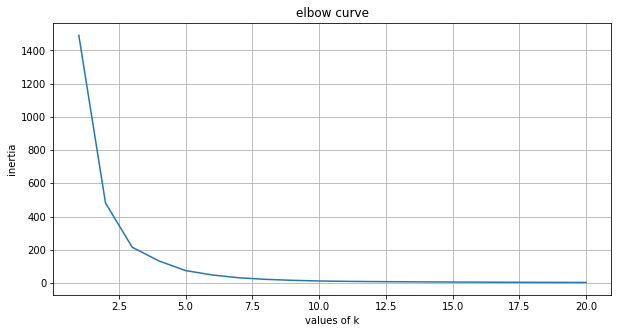

In [76]:
plt.figure(figsize = (10,5))
plt.plot(np.arange(1,21),inertia_list)
plt.grid(True)
plt.xlabel('values of k')
plt.ylabel('inertia')
plt.title('elbow curve')

**From above, we select the optimum value of k by determining the Elbow Point - a point after which the inertia starts decreasing linearly. In this case, we can select the value of k as 5.**